# Linear Regression

Linear regression is a method that allows us to study the statistical relationship between independent/predictor variables and dependent/response/outcome variables. It is simple to use and interpreting a linear regression model is straightforward. There are two variants:

 - Simple linear regression
   - One predictor variable, often denoted $x$
   - One response variable, often denoted $y$
 - Multiple linear regression
   - Two or more predictor variables
   - One dependent variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Simple Linear Regression

Simple linear regression assumes that there is a linear relationship between two continuous variables; the predictor variable $x$ and the response variable $y$. This can be described as: 

\begin{equation*}
y \thickapprox \beta_0 + \beta_1 x
\end{equation*}

where

 - $\thickapprox$ can be read as "*is approximately modeled as*". 
 - $\beta_0$ is called the *intercept* e.g. if $x=0$ then $y=\beta_0$
 - $\beta_1$ is called the *slope* (sometimes referred to as the coefficient). This basically describes the slope of the regression line e.g. if $x$ increases by 1 unit then $y$ increases by $\beta_1$ units.  
 
Together, $\beta_0$ and $\beta_1$ are called the model *coefficients* or *parameters*.

### Learning the Model Coefficients

Since these coefficients are unknown to begin with, we use our data to estimate or learn them using <a href="https://www.boomer.org/c/p3/c06/c0607.html">least squares criteria</a>. Essentially, we find the <a href="https://onlinecourses.science.psu.edu/stat501/node/252">best fitting line</a> by minimising the sum of squared errors/residuals. The errors or residuals are the differences between the observed value and the estimated value. We square the difference to avoid negative values. The *residual sum of squares (RSS)* is defined as:
\begin{equation*}
RSS = \sum_{i=1}^n{(y_i - \hat{y}_i)^2}
\end{equation*}
where

 - $y_i$ is the observed value
 - $\hat{y}_i$ is the estimated/fitted value
 
We can illustrate this with a plot:

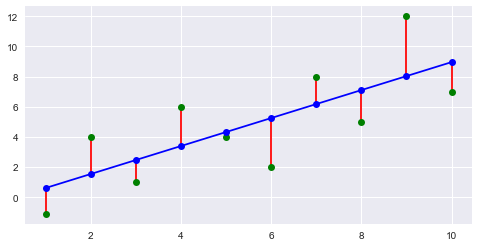

In [2]:
from sklearn.linear_model import LinearRegression

# Create artificial data
X = np.array([   1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Y = np.array([-1.1, 4, 1, 6, 4, 2, 8, 5, 12, 7])

# Create a model
lrm = LinearRegression()
lrm.fit(X.reshape(-1, 1), Y)
model_line = lrm.intercept_ + X * lrm.coef_[0]

fig, ax = plt.subplots(figsize=(8,4))

# Plot the data
ax.plot(X, Y, 'go') 

# Plot the regression line
ax.plot(X, model_line, 'bo-') # 

# Plot the residuals
ax.vlines(x=X, ymin=np.minimum(Y, model_line), ymax=np.maximum(Y, model_line), color='red')

The green dots represent our artificial data i.e. the observed data. The red vertical lines indicate the errors or the residuals.  The blue line represent the regression line that best fit the observed data. This line is found by minimising the residuals. 

### Multiple Linear Regression

Typically, we have more than one predictor variable (features) in our data. In such instances, we use Multiple Linear Regression:

\begin{equation*}
y \thickapprox \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
\end{equation*}



## Explore the Boston House Prices Dataset

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df = pd.DataFrame(data=boston.data, columns=boston['feature_names'])

# Add a column for the target feature
df['MEDV'] = boston['target'] 

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


Check data distributions.

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


We can get check if we have missing values in the dataset:

In [9]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

No missing data. If any of our features contained missing values, we could use a heatmap to get a quick overview of where there missing data are and a rough picture on how much data is missing.

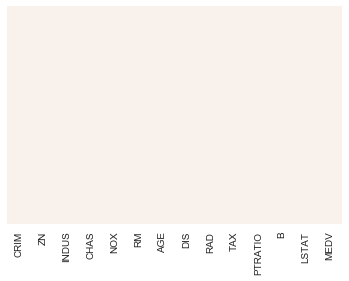

In [10]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

### Categorical features

Next step is to identify which features are categorical:

In [11]:
# Features with number of unique values
unq = { 
    column : df[column].nunique()
    for column in df.columns
}
unq

{'AGE': 356,
 'B': 357,
 'CHAS': 2,
 'CRIM': 504,
 'DIS': 412,
 'INDUS': 76,
 'LSTAT': 455,
 'MEDV': 229,
 'NOX': 81,
 'PTRATIO': 46,
 'RAD': 9,
 'RM': 446,
 'TAX': 66,
 'ZN': 26}

In [12]:
import operator
sorted(unq.items(), key=operator.itemgetter(1))

[('CHAS', 2),
 ('RAD', 9),
 ('ZN', 26),
 ('PTRATIO', 46),
 ('TAX', 66),
 ('INDUS', 76),
 ('NOX', 81),
 ('MEDV', 229),
 ('AGE', 356),
 ('B', 357),
 ('DIS', 412),
 ('RM', 446),
 ('LSTAT', 455),
 ('CRIM', 504)]

In [13]:
sorted(df['RAD'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0]

We see that CHAS is a Boolean feature. RAD (index of accessibility to radial highways) is also categorical since it has 9 distinct values. Let us fix them:

In [14]:
df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null category
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null category
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: category(2), float64(12)
memory usage: 49.0 KB


Since CHAS is a binary feature, we can use <a href="https://www.andrews.edu/~calkins/math/edrm611/edrm13.htm">Point-Biserial</a> to compute correlation between CHAS and MEDV:

In [16]:
from scipy import stats
stats.pointbiserialr(df['CHAS'], df['MEDV'])

PointbiserialrResult(correlation=0.17526017719029846, pvalue=7.3906231705208155e-05)

### Feature Selection

Before we can train a linear regression model, we must decide on which feature to pick as the independent variable. We must find a good predictor variable for the dependent variable. One way to find such a candidate is to create a heat map of the correlations between each of the features. Pearson's correlation can tell us as one variable increses, whether another variable increases (positive correlation), decreases (negative correlation), or stays the same (no correlation). Read more on <a href="https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable">Cross Validated</a>.

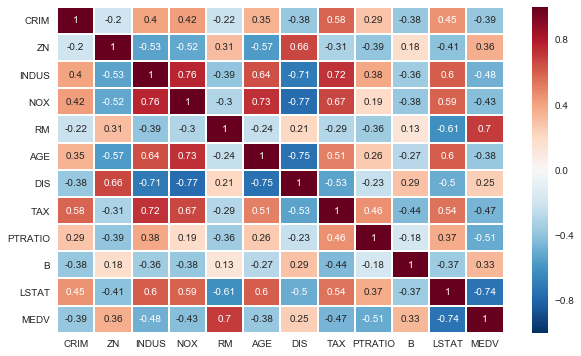

In [17]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot=True, linewidths=1)

There is a strong correlation between our target feature MEDV (the house price) and RM which is the average number of rooms per house. There are also negative correlations with LSTAT and PTRATIO. This means that as one of the variables (LSTAT or PTRATIO) increases then our dependent variable (MEDV) tends to decrease and the other way around.

For now, we focus on the relationship between MEDV and RM. Let us create a linear model plot of these two attributes:

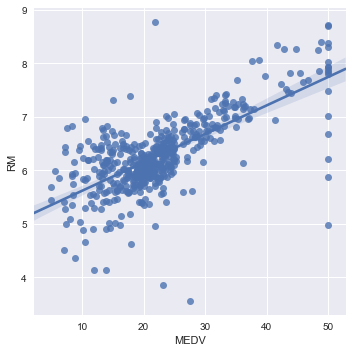

In [18]:
sns.lmplot(data=df, x='MEDV', y='RM')

From the plot, it looks like there is a good linear fit since the error bars are not that big.

### Train a Model

Before we can train a model, it is important to split the data into training set and testing set to avoid overfitting. Overfitting occurs when our model becomes too complex which may yield high accuracy on the training data but does not generalise well. 

Note that the `train_test_split()` method simply partitions data randomly. This means that we may get another coefficient if we run the method again. This means that the accuracy of our testing can vary depending on the random split. Therefore, a better approach would be to apply <a href="http://scikit-learn.org/stable/modules/cross_validation.html">k-fold cross-validation</a>. However, cross-validation may not work well when the data is not uniformly distributed.


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X = df['RM']
y = df['MEDV']

# Partition the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

lrm = LinearRegression()
lrm.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
intercept = lrm.intercept_
coefficient = lrm.coef_[0]
print("Intercept:   {0}\nCoefficient: {1}".format(intercept, coefficient))

Intercept:   -31.06739403994239
Coefficient: 8.567551750983585


It is straightforward to interpret the coefficient:

In [22]:
print('A unit increase in the RM feature is associated with a {0} units increase in the house price.'.format(coefficient))

A unit increase in the RM feature is associated with a 8.567551750983585 units increase in the house price.


### Generate Predictions

Now we use the fitted model to perform predictions on our test set. 

In [23]:
predicted = lrm.predict(X_test.values.reshape(-1, 1))

Let us check how far off the predicted values are from the observed values. We can visualise this via scatter plot. We can also plot a dashed line that indicates where perfect prediction values would lie.

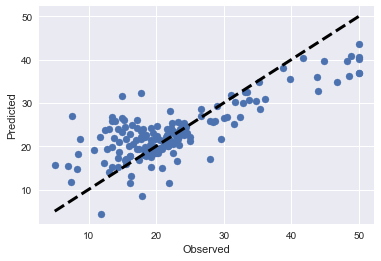

In [24]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', linewidth=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

Create a histogram of our residuals/errors. If the residuals follow a normal distribution, then we have selected a correct model for the data set. Otherwise, we may have to reconsider the choice of linear regression model.

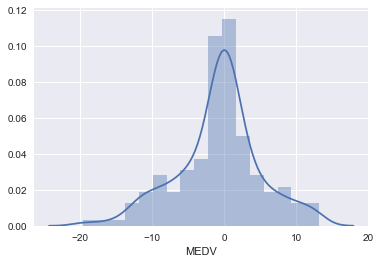

In [25]:
sns.distplot(y_test - predicted);

### Evaluate the Model

Next, we evaluate the performance of our model. The sci-learn library implements several <a href="http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics">metric functions</a>:

 **Mean Absolute Error** is the mean of the absolute value of the errors
 
 \begin{equation*}
 \frac{1}{n} \sum_{i=1}^n \mid y_i - \hat{y}_i \mid
 \end{equation*}
 
 **Median Absolute Error** is interesting because it is robust to outliers. 
 
 **Explained Variance Score**
  
 \begin{equation*}
 1- \frac{Var(y - \hat{y})}{Var(y)}
 \end{equation*}
 
 
 **Coefficient of Determination** ($R^2$) is often used as a tool for comparing different models. Although we want to achieve an $R^2$ value close to 1, there is no guarantee that a model with such high value will be good because $R^2$ is susceptible to overfitting.
 
 **Mean Squared Error** tends to be useful with real-world data because it takes "larger" errors into account 
 
 \begin{equation*}
 \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i )^2
 \end{equation*}
 
 **Root Mean Squared Error**

In [26]:
from sklearn import metrics

print('Mean Absolute Error:      ', metrics.mean_absolute_error(y_test, predicted))
print('Median Absolute Error:    ', metrics.median_absolute_error(y_test, predicted))
print('Explained Variance Score: ', metrics.explained_variance_score(y_test, predicted))
print('Coefficient of Determination (R^2): ', metrics.r2_score(y_test, predicted))
print('Mean Squared Error:       ', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error:       4.25158533333
Median Absolute Error:     2.83791229667
Explained Variance Score:  0.629424590611
Coefficient of Determination (R^2):  0.623482296308
Mean Squared Error:        34.5555063494
Root Mean Squared Error: 5.87839317751


## Common Issues

There are many potential challenges that arises when we learn a linear regression model using a particular data set. Here are few common issues:

- Collinearity
- Outliers

### Collinearity

We say that we have collinearity in our data set when two or more predictor variables are correlated with one another. These variables are called collinear variables. One collinear variable can predict another variable with high accuracy. In the left plot of <a href="http://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb#Figure-3.14">Figure 3.14</a> shows that there are no collinearity between Age and Limit. However, there is a high collinearity between Rating and Limit as shown in the right plot.

Collinearity can be a problem because it can be difficult to differentiate the effects that each of the collinear variables has on the dependent variables. Another issue is that model predictions tend to be less precise if there is high level of collinearity in our training set. Therefore, if two predictor variables are highly correlated then we should exclude one of them from our data set. Alternative approach is to use Ridge Regression .

### Outliers

Outliers ...